# SCA attack on ASCON

In [1]:
import chipwhisperer as cw
import numpy as np
import sys
sys.path.append( '../ASCON_init_python' )
sys.path.append( '../sca_python/analyzer/attack/ascon/' )

from ascon_sca import dpa_round_1_output_x0
from ascon_sca import cpa_round_1_output_x0_1_bit
from ascon_sca import cpa_round_1_output_x4_1_bit
from ascon_sca import cpa_round_1_output_x0_recover_x1_pool
from ascon_sca import cpa_round_1_output_x4_recover_x1_pool
from ascon_sca import cpa_round_1_pool
from ascon_sca import cpa_round_1_output_x0_x4_recover_x1_pool

sub_layer_dict = {
    "hw" : "ASCON_HW",
    "lut_ascon" : "SBOX_ASCON",
    "lut_bilgin" : "SBOX_BILGIN",
    "lut_allouzi" : "SBOX_ALLOUZI",
    "lut_lu_4" : "SBOX_LU_4",
    "lut_lu_5" : "SBOX_LU_5",
    "lut_lu_6" : "SBOX_LU_6",
    "lut_lu_7" : "SBOX_LU_7"
}

sub_layer_type = "hw"

To perform an attack on ASCON the first thing you need to do is instantiate the corresponding attack class:

`cpa_attack = cpa_round_1_pool(keys[0])`

The class needs as an input parameter the key with which the power traces were captured, to have an immediate visual feedback of the result of the attack.
After that by executing the attack_leak_model function the attack will start. 

`cpa_attack.attack_leak_model(wind_traces,nonces,sub_layer_type,callback,i)`

sub_layer_type supported
    + "hw",
    + "lut_ascon",
    + "lut_bilgin", 
    + "lut_allouzi",
    + "lut_lu_4", 
    + "lut_lu_5",
    + "lut_lu_6",
    + "lut_lu_7".

Each type of attack needs the following variables to work properly:
- dpa_round_1_output_x0 : 
    - traces (list): list of traces.
    - nonces (list): list of nonces.
    - sub_layer_type (string): specify the type of S-box. 
    - callback (int): specify the number of traces for the callback
- cpa_round_1_output_x0_1_bit : 
    - traces (list): list of traces.
    - nonces (list): list of nonces.
    - sub_layer_type (string): specify the type of S-box. 
    - callback (int): specify the number of traces for the callback
    - bitnum (int): column index for the attack
- cpa_round_1_output_x4_1_bit :
    - traces (list): list of traces.
    - nonces (list): list of nonces.
    - sub_layer_type (string): specify the type of S-box. 
    - callback (int): specify the number of traces for the callback
    - bitnum (int): column index for the attack
- cpa_round_1_output_x0_recover_x1_pool :
    - traces (list): list of traces.
    - nonces (list): list of nonces.
    - sub_layer_type (string): specify the type of S-box. 
    - callback (int): specify the number of traces for the callback
    - index (int): attack number index.
- cpa_round_1_output_x4_recover_x1_pool
    - traces (list): list of traces.
    - nonces (list): list of nonces.
    - sub_layer_type (string): specify the type of S-box. 
    - callback (int): specify the number of traces for the callback
    - index (int): attack number index.
- cpa_round_1_pool :
    - traces (list): list of traces.
    - nonces (list): list of nonces.
    - sub_layer_type (string): specify the type of S-box. 
    - callback (int): specify the number of traces for the callback
    - index (int): attack number index.
- cpa_round_1_output_x0_x4_recover_x1_pool :
    - traces (list): list of traces.
    - nonces (list): list of nonces.
    - sub_layer_type (string): specify the type of S-box. 
    - callback (int): specify the number of traces for the callback
    - index (int): attack number index.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,127,126,125,124,123,122,121,120,119,118,117,116,115,114,113,112
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,111,110,109,108,107,106,105,104,103,102,101,100,99,98,97,96
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1
4,95,94,93,92,91,90,89,88,87,86,85,84,83,82,81,80
5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
6,79,78,77,76,75,74,73,72,71,70,69,68,67,66,65,64
7,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1


FileNotFoundError: [Errno 2] No such file or directory: './Figures/success_60000_0.png'

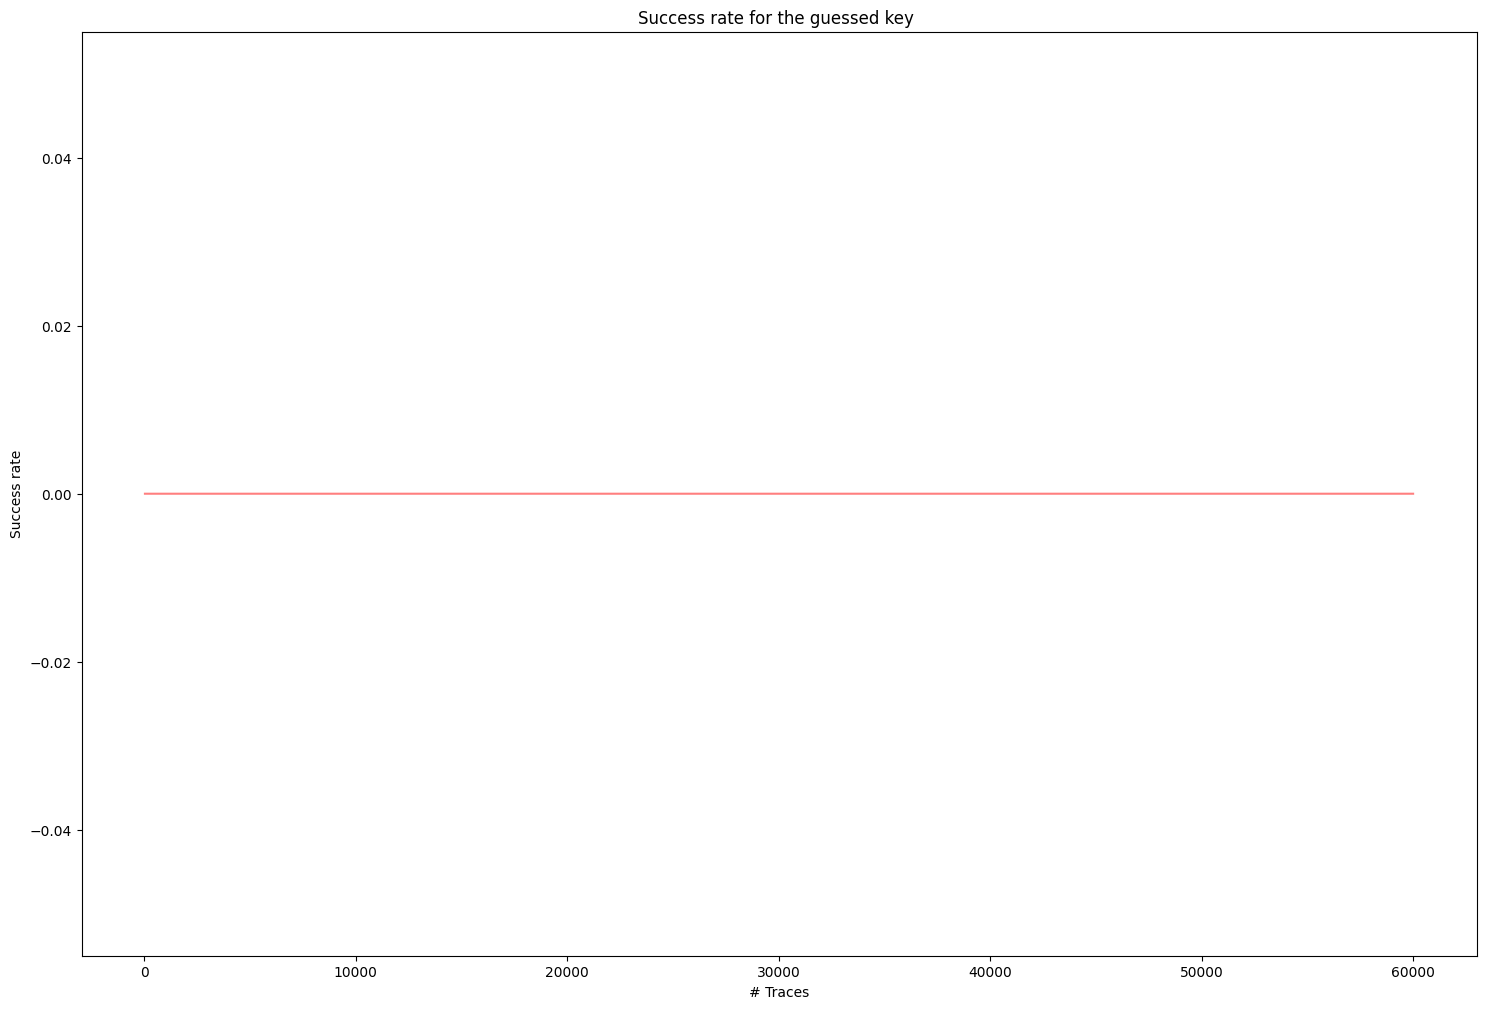

In [5]:
callback = 25
i = 0

project_file = "../../traceset/ascon_hw/sca_test_CW305_ascon_init_" + sub_layer_dict[sub_layer_type] + "_300000_0.cwp"
project = cw.open_project(project_file)

traces = project.waves[:]
nonces = project.textins[:]
keys = project.keys[:]

wind_traces = []
for trace in traces:
    wind_traces.append(trace[:100])

cpa_attack = cpa_round_1_output_x0_recover_x1_pool(keys[0])
cpa_attack.attack_leak_model(wind_traces,nonces,sub_layer_type,callback,i)